# Загружаем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
# Data processing, metrics and modeling
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np

In [81]:

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

# Исследование данных

In [6]:
data = pd.read_csv('/content/diabetes.csv')

In [7]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
display(data.info(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


([<matplotlib.patches.Wedge at 0x7f22c9d48b10>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'healthy: 500'),
  Text(0.5025944158780503, -0.9784676045369114, 'diabetic: 268')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.1'),
  Text(0.2741424086607547, -0.5337096024746789, '34.9')])

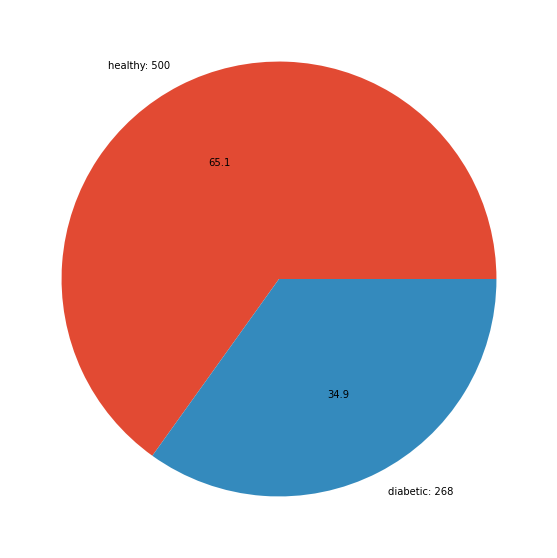

In [80]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]
d = data['Outcome'].value_counts()

lab = ['healthy: '+str(len(H)),'diabetic: '+str(len(D))]
plt.figure(figsize=(10, 10))
plt.pie(d, autopct='%.1f', labels=lab)

In [12]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [84]:
def figure_null():
  key = "Outcome"
  null_feat = pd.DataFrame(len(data[key]) - data.isnull().sum(), columns = ['Count'])
  percentage_null = pd.DataFrame((len(data[key]) - (len(data[key]) - data.isnull().sum()))/len(data[key])*100, columns = ['Count'])
  percentage_null = percentage_null.round(2)
  print(percentage_null)
  fig = plt.figure(figsize=(15, 7))
  ax = fig.add_axes([0,0,1,1])
  ind = null_feat.index
  count = null_feat['Count']
  ax.bar(ind, count)
  plt.show()

In [13]:
key = "Outcome"
null_feat = pd.DataFrame(len(data[key]) - data.isnull().sum(), columns = ['Count'])
percentage_null = pd.DataFrame((len(data[key]) - (len(data[key]) - data.isnull().sum()))/len(data[key])*100, columns = ['Count'])
percentage_null = percentage_null.round(2)

In [14]:
null_feat

,Count
Pregnancies,768
Glucose,763
BloodPressure,733
SkinThickness,541
Insulin,394
BMI,757
DiabetesPedigreeFunction,768
Age,768
Outcome,768


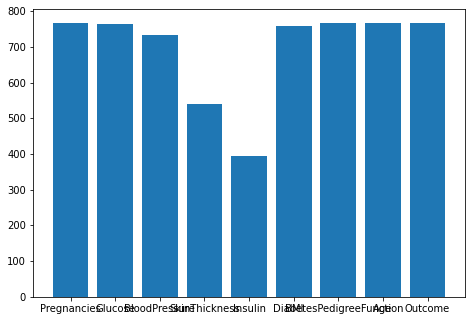

In [16]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ind = null_feat.index
count = null_feat['Count']
ax.bar(ind, count)
plt.show()

In [18]:
def correction_median(target_value):
  temp = data[data[target_value].notnull()]
  temp = temp[[target_value, 'Outcome']].groupby(['Outcome'])[[target_value]].median().reset_index()
  data.loc[(data['Outcome'] == 0) & (data[target_value].isnull()), target_value] = temp[target_value][0]
  data.loc[(data['Outcome'] == 1) & (data[target_value].isnull()), target_value] = temp[target_value][1]

In [19]:
correction_median('Insulin')

In [21]:
correction_median('Glucose')

In [22]:
correction_median('SkinThickness')

In [20]:
correction_median('BloodPressure')

In [23]:
correction_median('BMI')

In [24]:
key = "Outcome"
null_feat = pd.DataFrame(len(data[key]) - data.isnull().sum(), columns = ['Count'])
percentage_null = pd.DataFrame((len(data[key]) - (len(data[key]) - data.isnull().sum()))/len(data[key])*100, columns = ['Count'])
percentage_null = percentage_null.round(2)

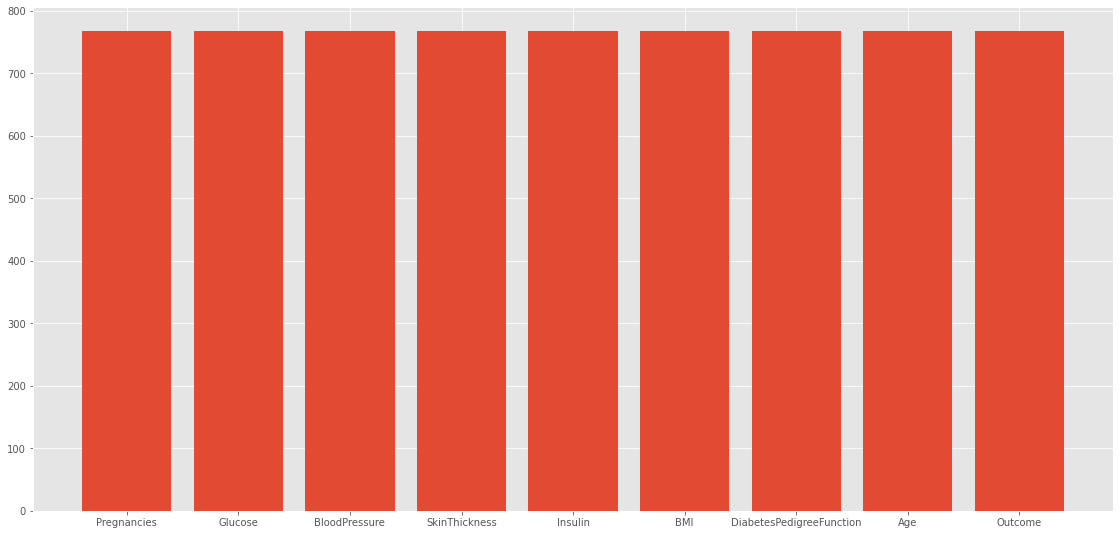

In [79]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ind = null_feat.index
count = null_feat['Count']
ax.bar(ind,count)
plt.show()

# Нейронная сеть

Подготовка данных

In [67]:
X = data.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = data.loc[:, ['Outcome']]

SyntaxError: ignored

In [30]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47


## Создание модели

In [46]:
np.random.seed(3)

In [31]:
model = Sequential()

Сигмоида:

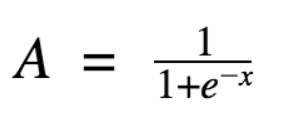

ReLU : A(x) = max(0, x)


In [32]:
model.add(Dense(12, input_dim=8, activation='relu'))

In [33]:
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Обучение и оценка результата

In [52]:
model.fit(tf.expand_dims(X, axis=1), Y, epochs = 1000, batch_size = 10)

Epoch 1/1000
77/77 [==============================] - 1s 5ms/step - loss: 0.1424 - accuracy: 0.9349
Epoch 2/1000
77/77 [==============================] - 0s 5ms/step - loss: 0.1484 - accuracy: 0.9232
Epoch 3/1000
77/77 [==============================] - 0s 5ms/step - loss: 0.1585 - accuracy: 0.9336
Epoch 4/1000
77/77 [==============================] - 0s 5ms/step - loss: 0.1594 - accuracy: 0.9336
Epoch 5/1000
77/77 [==============================] - 0s 5ms/step - loss: 0.1461 - accuracy: 0.9362
Epoch 6/1000
77/77 [==============================] - 0s 5ms/step - loss: 0.1547 - accuracy: 0.9362
Epoch 7/1000
77/77 [==============================] - 1s 7ms/step - loss: 0.1724 - accuracy: 0.9141
Epoch 8/1000
77/77 [==============================] - 1s 10ms/step - loss: 0.1539 - accuracy: 0.9310
Epoch 9/1000
77/77 [==============================] - 0s 4ms/step - loss: 0.1405 - accuracy: 0.9388
Epoch 10/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.1490 - accuracy: 0.925

In [53]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9453

accuracy: 94.53%


## Тестовый прогноз

In [58]:
prediction = model.predict(np.expand_dims([1, 136.0, 61.0, 30.0, 131.1, 35.3, 0.211, 25], axis=0))

In [61]:
prediction[0][0]

0.576769